<a href="https://colab.research.google.com/github/elichen/aoc2018/blob/main/Day_23_Experimental_Emergency_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data = """pos=<0,0,0>, r=4
pos=<1,0,0>, r=1
pos=<4,0,0>, r=3
pos=<0,2,0>, r=1
pos=<0,5,0>, r=3
pos=<0,0,3>, r=1
pos=<1,1,1>, r=1
pos=<1,1,2>, r=1
pos=<1,3,1>, r=1""".split('\n')

In [2]:
data = """pos=<10,12,12>, r=2
pos=<12,14,12>, r=2
pos=<16,12,12>, r=4
pos=<14,14,14>, r=6
pos=<50,50,50>, r=200
pos=<10,10,10>, r=5""".split('\n')

In [3]:
data = [x.rstrip() for x in open("input.txt").readlines()]

In [4]:
# Define the function to parse the string data into a list of positions and radius values

def parse_positions_and_radii(data):
    parsed_data = []
    for item in data:
        # Splitting each string at ', ' to separate the position and radius
        pos_str, r_str = item.split(", r=")

        # Extracting the coordinates from the position string
        pos = tuple(map(int, pos_str.lstrip('pos=<').rstrip('>').split(',')))

        # Converting the radius string to an integer
        r = int(r_str)

        # Adding the tuple of position and radius to the parsed data list
        parsed_data.append((pos, r))

    return parsed_data

parsed_data = parse_positions_and_radii(data)

In [5]:
def manhattan_distance_3d(point1, point2):
    return sum(abs(a - b) for a, b in zip(point1, point2))

strongest = max(parsed_data, key=lambda x:x[1])
total = 0
for r in parsed_data:
  if manhattan_distance_3d(r[0],strongest[0]) <= strongest[1]:
    total += 1
total

383

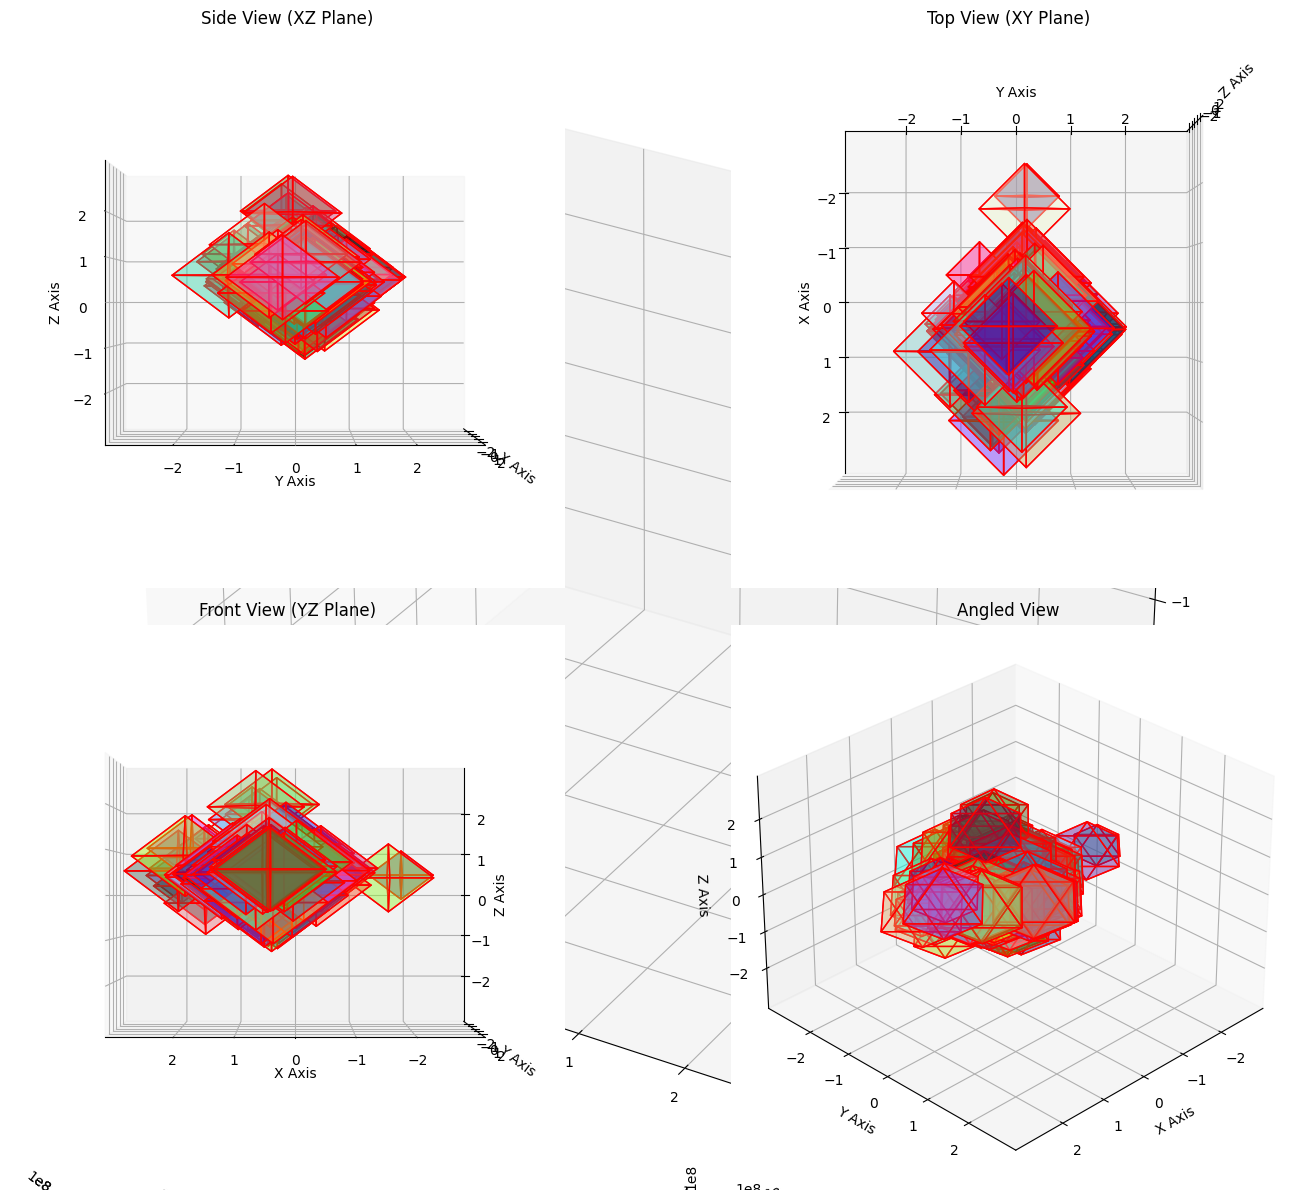

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Plotting static side, top, front, and angled views of the octahedrons
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Side view (XZ plane)
ax1 = fig.add_subplot(221, projection='3d')
ax1.view_init(azim=0, elev=0)

# Top view (XY plane)
ax2 = fig.add_subplot(222, projection='3d')
ax2.view_init(azim=0, elev=90)

# Front view (YZ plane)
ax3 = fig.add_subplot(223, projection='3d')
ax3.view_init(azim=90, elev=0)

# Angled view
ax4 = fig.add_subplot(224, projection='3d')
ax4.view_init(azim=45, elev=30)

def create_octahedron_vertices(cx, cy, cz, r):
    return np.array([
        [cx + r, cy, cz], [cx - r, cy, cz],
        [cx, cy + r, cz], [cx, cy - r, cz],
        [cx, cy, cz + r], [cx, cy, cz - r]
    ])

def create_octahedron_faces(vertices):
    return [
        [vertices[0], vertices[2], vertices[4]],
        [vertices[0], vertices[3], vertices[4]],
        [vertices[0], vertices[3], vertices[5]],
        [vertices[0], vertices[2], vertices[5]],
        [vertices[1], vertices[2], vertices[4]],
        [vertices[1], vertices[3], vertices[4]],
        [vertices[1], vertices[3], vertices[5]],
        [vertices[1], vertices[2], vertices[5]]
    ]

# Function to add octahedrons to axes
def add_octahedrons_to_axes(ax):
    for pos, radius in parsed_data:
        vertices = create_octahedron_vertices(*pos, radius)
        faces = create_octahedron_faces(vertices)
        poly3d = [list(map(lambda x: [x[0], x[1], x[2]], face)) for face in faces]
        ax.add_collection3d(Poly3DCollection(poly3d, facecolors=np.random.rand(3,), linewidths=1, edgecolors='r', alpha=.25))
        ax.set_xlim([-max_extent, max_extent])
        ax.set_ylim([-max_extent, max_extent])
        ax.set_zlim([-max_extent, max_extent])
        ax.set_xlabel('X Axis')
        ax.set_ylabel('Y Axis')
        ax.set_zlabel('Z Axis')

max_extent = max([max(np.abs(pos)) + radius for pos, radius in parsed_data])
ax.set_xlim([-max_extent, max_extent])
ax.set_ylim([-max_extent, max_extent])
ax.set_zlim([-max_extent, max_extent])
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Add octahedrons to each subplot
add_octahedrons_to_axes(ax1)
add_octahedrons_to_axes(ax2)
add_octahedrons_to_axes(ax3)
add_octahedrons_to_axes(ax4)

# Titles for each subplot
ax1.set_title('Side View (XZ Plane)')
ax2.set_title('Top View (XY Plane)')
ax3.set_title('Front View (YZ Plane)')
ax4.set_title('Angled View')

plt.tight_layout()
plt.show()